In [75]:
apikey = 'ENTERYOURAPIKEY'
apisecret = 'ENTERYOURSECRETKEY'

from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_prices(ticker):
    client = Client(apikey, apisecret)
    hist_df = pd.DataFrame(client.get_historical_klines(ticker, Client.KLINE_INTERVAL_1DAY, '1 July 2021'))

    hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

    hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
    hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

    hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)
    return hist_df

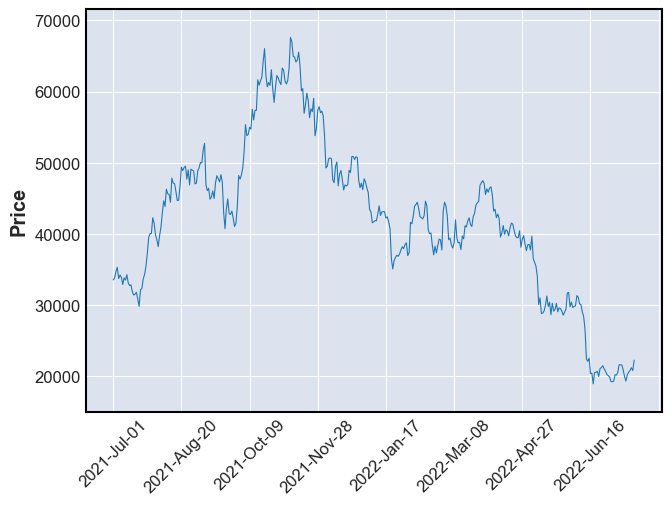

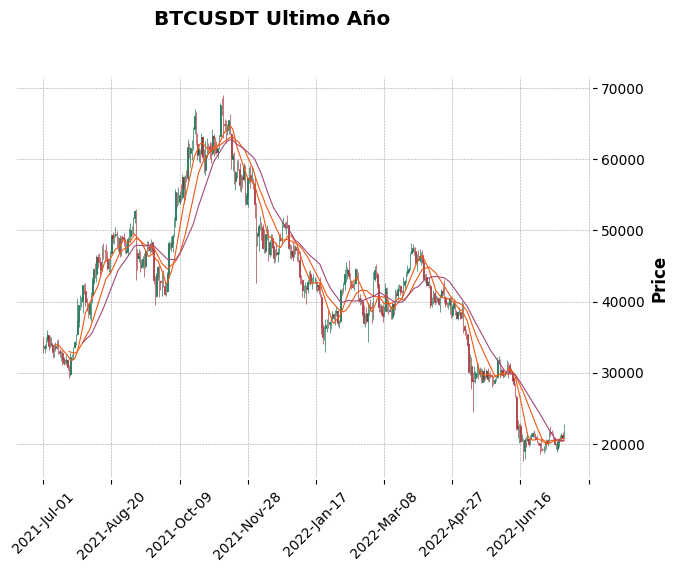

In [88]:
hist_df = get_prices('BTCBUSD')
busd_usdt = get_prices('BUSDUSDT')[["Open Time", "Close"]]
busd_usdt.rename(columns = {'Close':'busdusdt'}, inplace = True)
hist_df = hist_df.merge(busd_usdt,how='left',on='Open Time')
hist_df['Close'] = hist_df['Close']/hist_df['busdusdt']
plot = hist_df.set_index('Close Time')
mpf.plot(plot,type='line') 

mpf.plot(hist_df.set_index('Close Time'), 
        type='candle', style='charles', 
        volume=False, 
        title='BTCUSDT Ultimo Año', 
        mav=(10,20,30))


In [89]:
li_btc = pd.read_csv('BTC_USD.csv',parse_dates=['date'])
li_btc['price'] = li_btc['price'].replace('[\$,]', '', regex=True).astype(float)
li_btc.head()

,date,symbol,price
0,2022-07-14,BTC/USD,20349.34
1,2022-07-13,BTC/USD,20313.28
2,2022-07-12,BTC/USD,19398.42
3,2022-07-11,BTC/USD,20029.51
4,2022-07-10,BTC/USD,20939.50


In [90]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore,busdusdt
0,2021-07-01,35045.36,35068.36,32723.75,33516.713343,21759.596142,2021-07-01 23:59:59.999000064,7.315434e+08,434412,10643.443950,3.577586e+08,0,0.9998
1,2021-07-02,33510.00,33987.52,32697.06,33789.098910,16804.549908,2021-07-02 23:59:59.999000064,5.592665e+08,348945,8375.955682,2.788491e+08,0,0.9999
2,2021-07-03,33788.26,34950.00,33322.78,34684.656931,12466.909459,2021-07-03 23:59:59.999000064,4.277337e+08,273320,6483.368899,2.222599e+08,0,0.9998
3,2021-07-04,34676.20,35970.00,34371.23,35289.840000,11770.593582,2021-07-04 23:59:59.999000064,4.158464e+08,277180,5929.398950,2.094812e+08,0,1.0000
4,2021-07-05,35292.72,35296.25,33140.00,33714.004201,18477.164767,2021-07-05 23:59:59.999000064,6.288249e+08,366246,8918.175068,3.035619e+08,0,0.9997


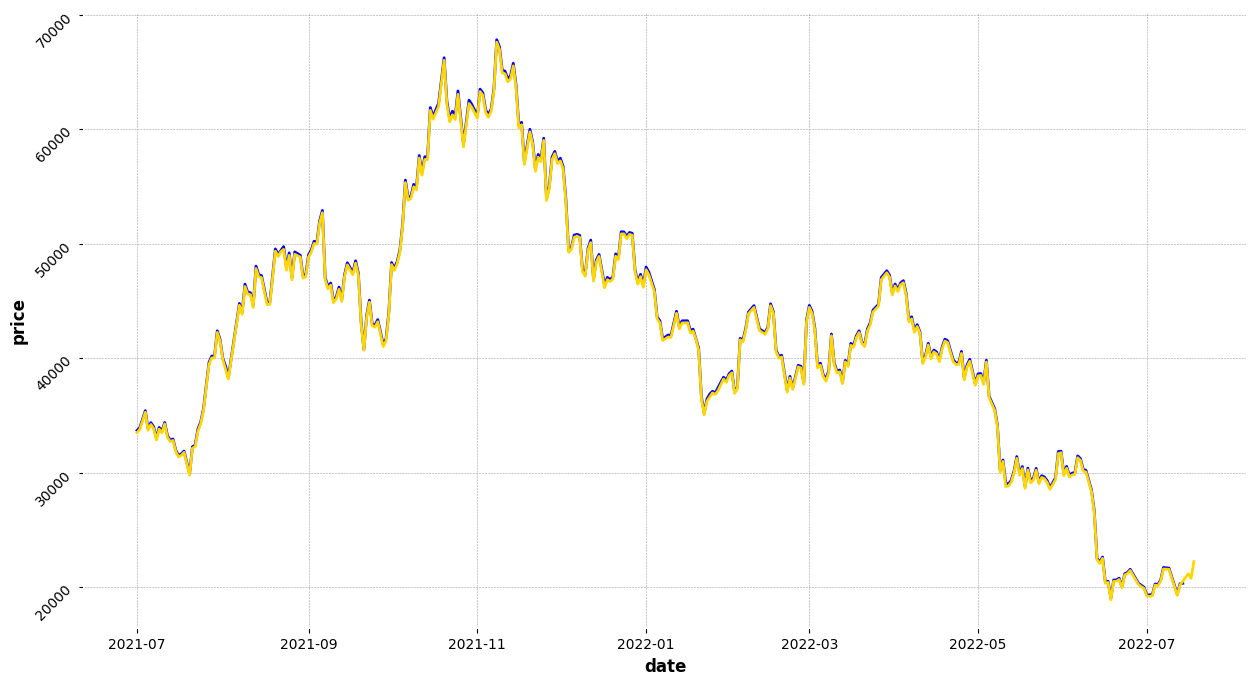

In [91]:
#plot_li = li_btc.set_index('date')

plt.figure(figsize = (15,8))
ax = sns.lineplot(data=li_btc,y='price',x='date',color='blue') 
ax1 = sns.lineplot(x='Open Time', y='Close', data=hist_df,color='gold')
plt.yticks(rotation=45)
plt.show()


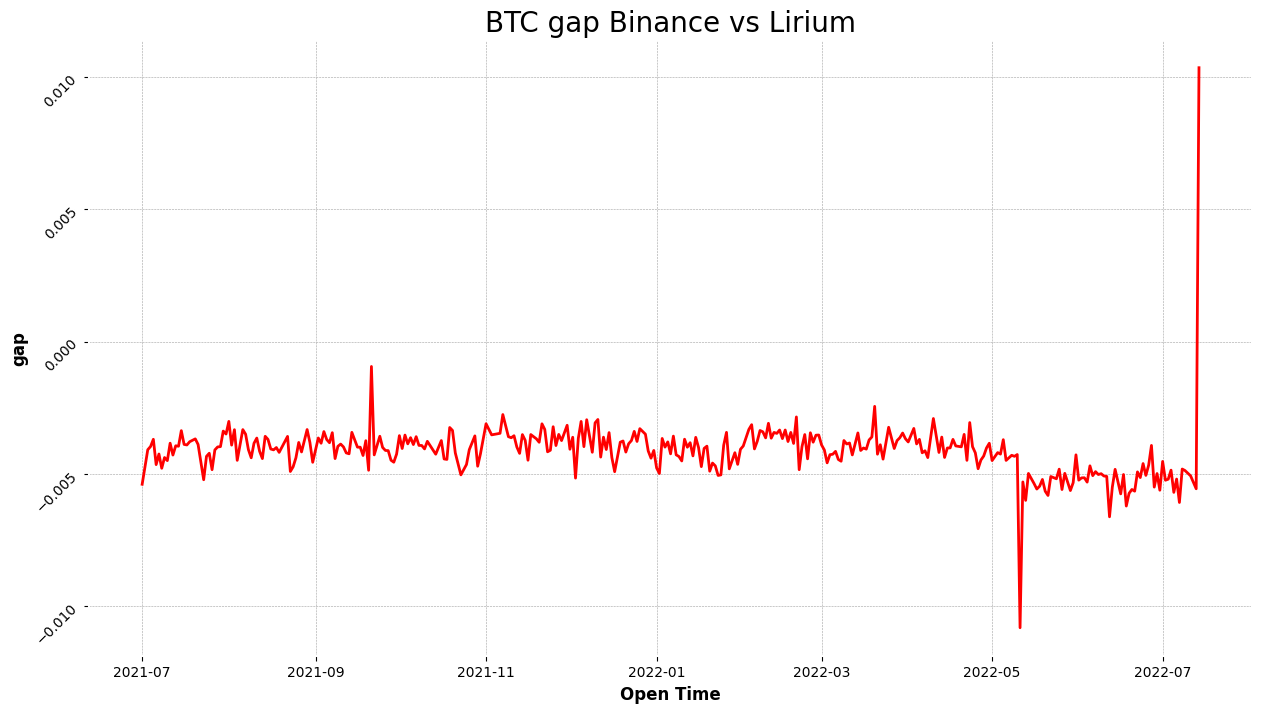

In [92]:
diff = hist_df.merge(li_btc,how='left',left_on='Open Time',right_on='date')
#diff['gap'] = (diff['Close'] - diff['price'])/diff['price']
diff['gap'] = (diff['Close']/diff['price']) - 1


plt.figure(figsize = (15,8))
ax = sns.lineplot(x='Open Time', y='gap', data=diff,color='red')
ax.set_title('BTC gap Binance vs Lirium',fontsize=20)
plt.yticks(rotation=45)
plt.show()


  20.000 [USDT/BTC]
  
  
  0.998 [USDT/BUSD]
  
  
  20.040 [BUSD/BTC]

In [77]:
li_eth = pd.read_csv('ETH_USD.csv',parse_dates=['date'])
li_eth['price'] = li_eth['price'].replace('[\$,]', '', regex=True).astype(float)
li_eth.head()

,date,symbol,price
0,2022-07-14,ETH/USD,1118.30
1,2022-07-13,ETH/USD,1119.47
2,2022-07-12,ETH/USD,1039.73
3,2022-07-11,ETH/USD,1100.02
4,2022-07-10,ETH/USD,1171.20


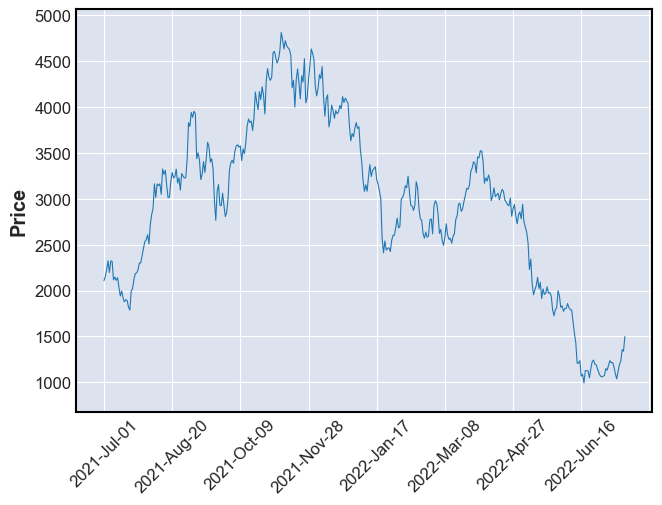

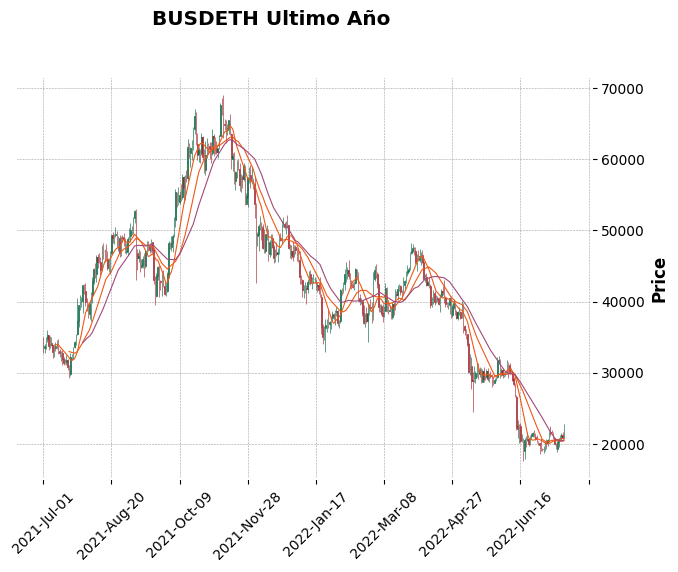

In [94]:
hist_df_eth = get_prices('ETHBUSD')
plot = hist_df_eth.set_index('Close Time')
mpf.plot(plot,type='line') 

mpf.plot(hist_df.set_index('Close Time'), 
        type='candle', style='charles', 
        volume=False, 
        title='BUSDETH Ultimo Año', 
        mav=(10,20,30))


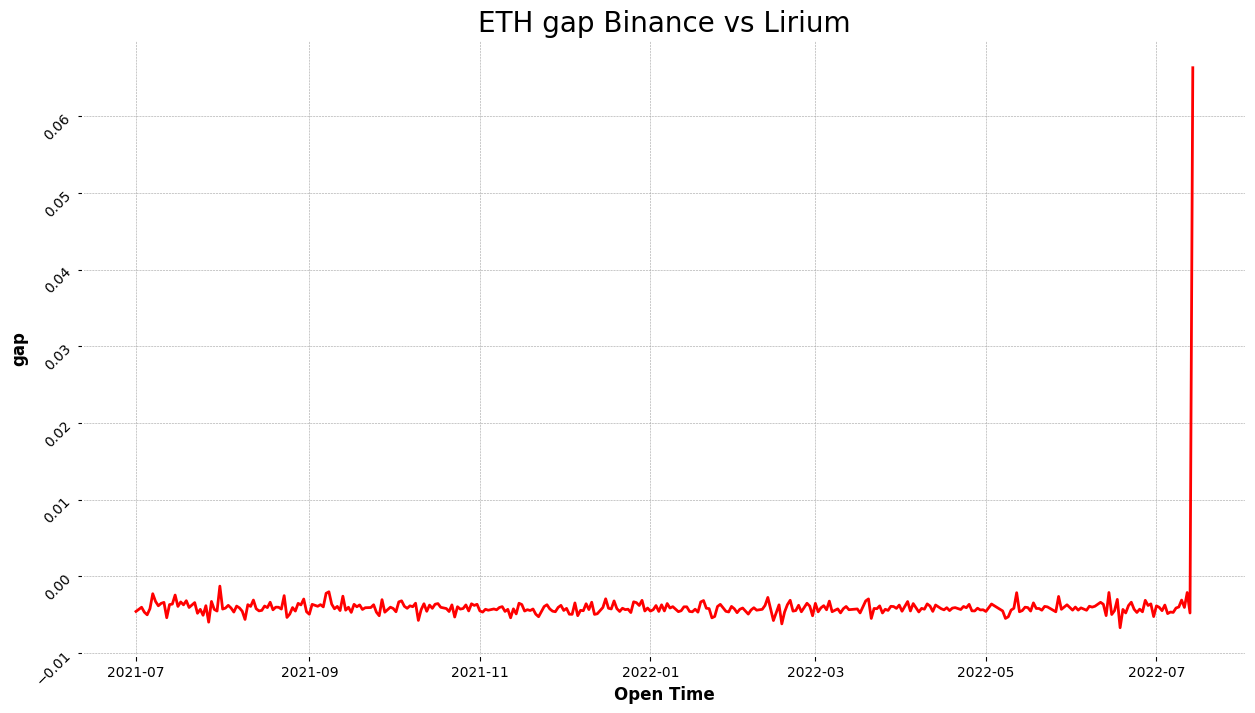

In [95]:
diff = hist_df_eth.merge(li_eth,how='left',left_on='Open Time',right_on='date')
#diff['gap'] = (diff['Close'] - diff['price'])/diff['price']
diff['gap'] = (diff['Close']/diff['price']) - 1


plt.figure(figsize = (15,8))
ax = sns.lineplot(x='Open Time', y='gap', data=diff,color='red')
ax.set_title('ETH gap Binance vs Lirium',fontsize=20)
plt.yticks(rotation=45)
plt.show()


In [100]:
#!pip install nbconvert